**Saksinkarn Petchkuljinda; 630510600**

## Idea of Polynomial Interpolation

Suppose we have $n+1$ datasets in the form of pairs $(x_0, y_0), ..., (x_n, y_n)$. We would like to find such the polynomial with minimum degree $p$ named $Q_p(x)$, such that:

$$Q_p(x_i) = y_i$$

For every $i\in\{0, ..., n\}$.

If $x_0, ..., x_n$ are distinct, then for any $f(x_0), ..., f(x_n)$ there **exists** a **unique** polynomial $Q_n(x)$ with sequence of coefficients $a_0, ..., a_n$ such that $Q_n(x_i) = y_i$ for all $i\in\{0, ..., n\}$, where:

$$
Q_n(x) = a_0+a_1x+a_2x^2+...+a_nx^n
$$

## Lagrange Polynomial

Lagrange proposed that we can build an interpolating polynomial (to interpolate a function $f:A\rightarrow B$) in the form of:

$$
Q_n(x) = \sum^n_{j=0} f(x_i)L_j(x)=f(x_0)L_0(x)+f(x_1)L_1(x)+...f(x_n)L_n(x)
$$

For such the interpolants to be possible, it is:

$$
Q_n(x_i) = f(x_i); 0\leq i\leq n
$$

**Key Idea:  We want to find $L_j(x)$ for each $j\in\{0,...,n\}$ that:**

$$
L_j(x) = 
\begin{cases}
1 &\text{if } x=x_j \\
0 &\text{otherwise}
\end{cases}
$$

We can find $L_j(x)$ with:

$$
\begin{align*}
L_j(x) &= \frac{(x-x_0)(x-x_1)...(x-x_{j-1})(x-x_{j+1})...(x-x_n)}{(x_j-x_0)(x_j-x_1)...(x_j-x_{j-1})(x_j-x_{j+1})...(x_j-x_n)} \\
&= \frac{\prod^n_{i=0,i\neq j} (x-x_i)}{\prod^n_{i=0,i\neq j} (x_j-x_i)}
\end{align*}
$$

For $j\in\{0, ..., n\}$

*(Notice that we skip $x_j$ when it comes to $x_{j-1}$ to $x_{j+1}$ for the second monomial in the product)*

**More explanation:** The idea of Lagrange Interpolating Polynomials is to calcucate the proportion of significance of any given $x$ (denoted as $L_j(x)$) compared to the known interpolated points $(x_i, y_i); 0\leq i\lt n$. The proportion will then multiply the known corresponding $y$ value to calculate *how much the actual value is compared to such the proportion of significance it has*. All are then summed up to get the total of each combination of weighed values.

***Ideally,*** if we substitute $x=x_j$, it will eventually divide all the terms in the denominator and the product will be 1. That is:

$$
L_j(x) = \frac{\cancel{(x_j-x_0)(x_j-x_1)...(x_j-x_{j-1})(x_j-x_{j+1})...(x_j-x_n)}}{\cancel{(x_j-x_0)(x_j-x_1)...(x_j-x_{j-1})(x_j-x_{j+1})...(x_j-x_n)}} = 1
$$

If we substitute $x=x_i$ where $x_i\in \mathbb{D}_f$ and $i\neq j$, there will be one term in the nominator that becomes zero, or:

$$
L_j(x) = \frac{(x_i-x_0)(x_i-x_1)...\cancel{(x_i-x_i)}(x_i-x_{i+1})...(x_i-x_n)}{(x_j-x_0)(x_j-x_1)...(x_j-x_{j-1})(x_j-x_{j+1})...(x_j-x_n)} = 0
$$

**It means that $x$ is the perfect match to $x_j$ and will be given full importance to 100%, That will make all other $L$ become zeros.**

**On the other hand, practically speaking**, $\exists x\notin\mathbb{D}_f$, so neither $L$ will become zero or one. The interpolated value will then be a balanced proportion of each known interpolant.

## Polynomial Implementation

In [2]:
using Printf
using LaTeXStrings

Declare a class-like type for a polynomial.

In [3]:
Polynomial::Type{Dict{Int64, Float64}} = Dict{Int64, Float64}
# Dict of coefficient, followed by exponent

Dict{Int64, Float64}

Declare method-like functions for a polynomial.

In [4]:
function addToPolynomial!(
        poly::Polynomial,
        expo::Int64,
        coef::Float64,
    )::Nothing
    
    poly[expo] = get(poly, expo, 0.0) + coef
    
    # this code reduces calculation overhead from zero terms
    # iszero(x) is specifically made for floating-point numbers
    if iszero(poly[expo]) 
        delete!(poly, expo)
    end
    
    return nothing
end

addToPolynomial! (generic function with 1 method)

In [5]:
function addMultipleToPolynomial!(
        poly::Polynomial,
        monos::Union{Vector{Pair{Int64, Float64}}, Polynomial},
    )::Nothing
    for (expo, coef) in monos
        addToPolynomial!(poly, expo, coef)
    end
    return nothing
end

addMultipleToPolynomial! (generic function with 1 method)

In [6]:
function calcPoly(poly::Polynomial, x::Float64)::Float64
    ret::Float64 = 0.0
    for (expo, coef) in poly
        ret += coef * x ^ expo
    end
    return ret
end

calcPoly (generic function with 1 method)

In [7]:
function printRawPoly(poly::Polynomial)::String
    txt::String = ""
    for (i, expo) in enumerate(sort(collect(keys(poly)), rev=true))
        if i > 1 && poly[expo] >= 0
            txt = string(txt, "+")
        end
        txt = string(txt, "$(poly[expo])")
        if expo > 0
            txt = string(txt, "x")
        end
        if expo > 1
            txt = string(txt, "^$expo")
        end
    end
    return txt
end

printRawPoly (generic function with 1 method)

In [8]:
function printPoly(poly::Polynomial)::LaTeXString
    return LaTeXString("\$" * printRawPoly(poly) * "\$")
end

printPoly (generic function with 1 method)

In [9]:
# to pass a polynomial, use <poly> in the format string
function printFormattedPoly(
        txt::String,
        polies::Vararg{Polynomial},
    )::LaTeXString
    for poly in polies
        txt = replace(txt, "<poly>" => printRawPoly(poly), count=1)
    end
    return LaTeXString("\$" * txt * "\$")
end

printFormattedPoly (generic function with 1 method)

Test by building instances of the polynomial $P(x) = x^2 + 2x + 1$ in a variety of ways.

In [10]:
p1::Polynomial = Polynomial(Dict(2 => 1.0, 0 => 1.0, 1 => 2.0))
printFormattedPoly("p_1 = <poly>", p1)

L"$p_1 = 1.0x^2+2.0x+1.0$"

In [11]:
p2::Polynomial = Polynomial(Dict())
addToPolynomial!(p2, 2, 1.0)
addToPolynomial!(p2, 0, 1.0)
addToPolynomial!(p2, 1, 2.0)
printFormattedPoly("p_2 = <poly>", p2)

L"$p_2 = 1.0x^2+2.0x+1.0$"

In [12]:
p3::Polynomial = Polynomial(Dict())
addMultipleToPolynomial!(p3, [2 => 1.0, 0 => 1.0, 1 => 2.0])
printFormattedPoly("p_3 = <poly>", p3)

L"$p_3 = 1.0x^2+2.0x+1.0$"

In [13]:
LaTeXString("\$p_1(5) = $(calcPoly(p1, 5.0))\$")

L"$p_1(5) = 36.0$"

In [14]:
LaTeXString("\$p_2(5) = $(calcPoly(p2, 5.0))\$")

L"$p_2(5) = 36.0$"

In [15]:
LaTeXString("\$p_3(5) = $(calcPoly(p3, 5.0))\$")

L"$p_3(5) = 36.0$"

OK, it works! Now let's provide more operations over our Polynomial.

In [16]:
function polyPlus(p1::Polynomial, p2::Polynomial)::Polynomial
    ret::Polynomial = copy(p1)
    addMultipleToPolynomial!(ret, p2)
    
    return ret
end

function negPoly(poly::Polynomial)::Polynomial
    ret::Polynomial = copy(poly)
    for (expo, coef) in ret
        ret[expo] = -coef
    end
    
    return ret
end

function polyMinus(p1::Polynomial, p2::Polynomial)::Polynomial
    ret::Polynomial = copy(p1)
    neg_p2 = negPoly(p2)
    addMultipleToPolynomial!(ret, neg_p2)
    
    return ret
end

function polyMul(p1::Polynomial, p2::Polynomial)::Polynomial
    ret::Polynomial = Polynomial(Dict())
    for (expo1, coef1) in p1
        for (expo2, coef2) in p2
            addToPolynomial!(ret, expo1 + expo2, coef1 * coef2)
        end
    end
    
    return ret
end

polyMul (generic function with 1 method)

Test

In [17]:
p1::Polynomial = Polynomial(Dict(2 => 1.0, 1 => -2.0, 0 => 1.0))
printFormattedPoly("p_1 = <poly>", p1)

L"$p_1 = 1.0x^2-2.0x+1.0$"

In [18]:
p2::Polynomial = Polynomial(Dict(1 => 1.0, 0 => -1.0))
printFormattedPoly("p_2 = <poly>", p2)

L"$p_2 = 1.0x-1.0$"

In [19]:
printFormattedPoly("p_1 + p_2 = <poly>", polyPlus(p1, p2))

L"$p_1 + p_2 = 1.0x^2-1.0x$"

In [20]:
printFormattedPoly("p_1 - p_2 = <poly>", polyMinus(p1, p2))

L"$p_1 - p_2 = 1.0x^2-3.0x+2.0$"

In [21]:
printFormattedPoly("p_1 \\cdot p_2 = <poly>", polyMul(p1, p2))

L"$p_1 \cdot p_2 = 1.0x^3-3.0x^2+3.0x-1.0$"

## Implementation of Lagrange Polynomials

Let's started by building a class for building $L_j$

In [22]:
function mulConstToPoly(poly::Polynomial, c::Float64)::Polynomial
    # @printf("Before: ")
    # println(printPoly(poly))
    ret::Polynomial = copy(poly)
    for (expo, coef) in ret
        ret[expo] = c * coef
    end
    
    # @printf("After: ")
    # println(printPoly(ret))
    
    return ret
end

mulConstToPoly (generic function with 1 method)

In [23]:
function L(Xs::Vector{Float64}, j::Int64)::Polynomial
    xj::Float64 = Xs[j]
    ret::Polynomial = Polynomial(Dict(0 => 1.0))  # initial P(x) = 1x^0 = 1
    denom::Float64 = 1.0
    
    # println("Building L$j: x_%j = $xj")
    
    for (i, x) in enumerate(Xs)
        if i == j
            continue
        end
        
        current::Polynomial = Polynomial(Dict(1 => 1.0, 0 => -x))
        ret = polyMul(ret, current)
        denom::Float64 *= xj - x
    end
    
    ret = mulConstToPoly(ret, 1.0/denom)
    # println(printPoly(ret))
    return ret
end

L (generic function with 1 method)

Declare a function to build a Lagrange Polynomial.

In [24]:
function buildLagrange(data::Dict{Float64, Float64})::Polynomial  # takes pairs of (x, y) where x must be distinct
    Xs::Vector{Float64} = sort(collect(keys(data)))
    ret::Polynomial = Polynomial(Dict())
    for (i, x) in enumerate(Xs)
        l::Polynomial = L(Xs, i)
        term::Polynomial = mulConstToPoly(l, data[x])
        # println("data[$x] = $(data[x])")
        # println("multiplied term: $(printPoly(term))")
        ret = polyPlus(ret, term)
    end
    
    return ret
end

buildLagrange (generic function with 1 method)

**Let's Test!**

Suppose we have the following data:

In [25]:
mySample = Dict(
    1.0 => 4.5,
    1.5 => 6.0,
    3.0 => 1.0,
)

Dict{Float64, Float64} with 3 entries:
  1.5 => 6.0
  3.0 => 1.0
  1.0 => 4.5

Then we build a Lagrange polynomial named `myLagrange`.

In [26]:
myLagrange::Polynomial = buildLagrange(mySample)
printFormattedPoly("\\mathrm{myLagrange}=<poly>", myLagrange)

L"$\mathrm{myLagrange}=-3.1666666666666665x^2+10.916666666666666x-3.25$"

Let's test the how it works.

In [27]:
using Plots

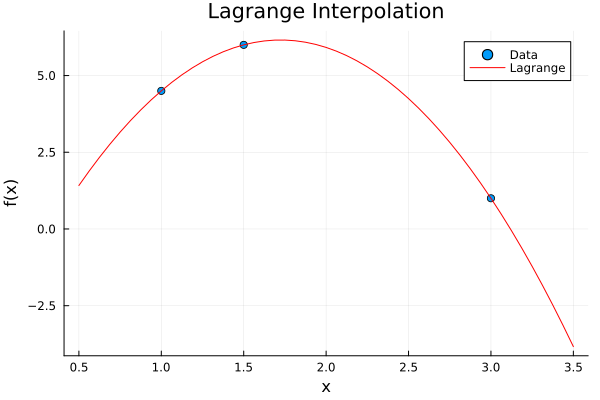

In [28]:
Xs = collect(keys(mySample))
y = [mySample[x] for x in Xs]

xhat = 0.5:0.0625:3.5
yhat = [calcPoly(myLagrange, x) for x in xhat]

scatter(
    Xs,
    y,
    label="Data",
    xlabel="x",
    ylabel="f(x)",
    title="Lagrange Interpolation",
)
plot!(xhat, yhat, color="red", label="Lagrange")

**Another question:** What's the value of $y$ at $x=2.5$?

In [29]:
printFormattedPoly("y_{x=2.5} = $(calcPoly(myLagrange, 2.5))")

L"$y_{x=2.5} = 4.25$"

Let's compared to the plot above.

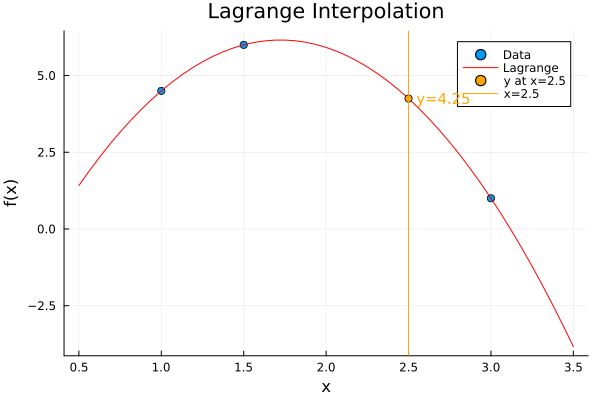

In [30]:
Xs = collect(keys(mySample))
y = [mySample[x] for x in Xs]

xhat = 0.5:0.0625:3.5
yhat = [calcPoly(myLagrange, x) for x in xhat]

scatter(
    Xs,
    y,
    label="Data",
    xlabel="x",
    ylabel="f(x)",
    title="Lagrange Interpolation",
)
plot!(xhat, yhat, color="red", label="Lagrange")
scatter!([2.5], [4.25], color="orange", label="y at x=2.5")
vline!([2.5], color="orange", label="x=2.5")
annotate!(2.55, 4.5, text("y=4.25", :left, :top, 10, :orange))

## Test on complex data

We will try to interpolate $f(x) = \mathrm{sin}(x\cdot \mathrm{sin}(\mathrm{sin}(\mathrm{sin}(\mathrm{sin}(\mathrm{sin}(\mathrm{sin}(\mathrm{sin}(\mathrm{sin}(x)))))))))$ to see what would happen.

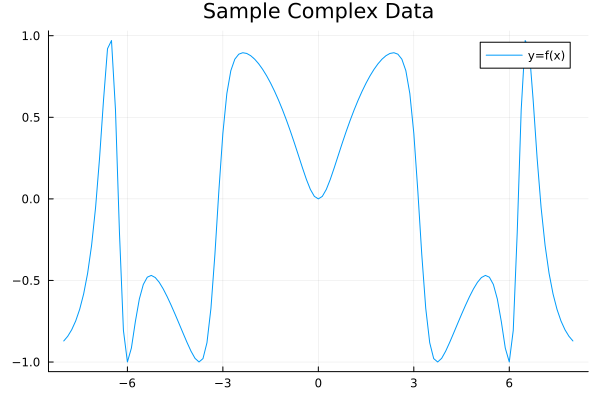

In [31]:
Xs = -8.0:0.125:8.0
f = x -> sin(x * sin(sin(sin(sin(sin(sin(sin(sin(x)))))))))
Yreal = [f(x) for x in Xs]

plot(Xs, Yreal, title="Sample Complex Data", label="y=f(x)")

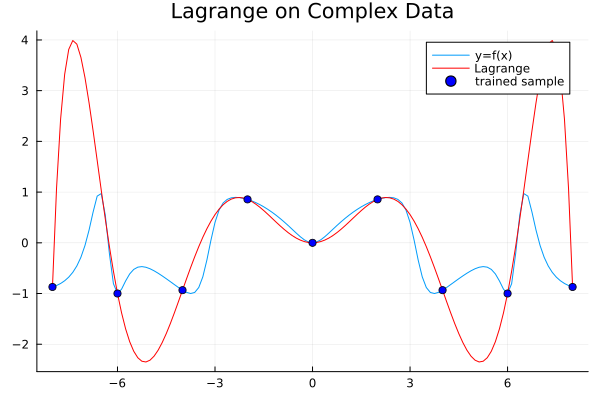

In [40]:
Xlag = -8.0:2.0:8.0
lagrange = buildLagrange(Dict(x => f(x) for x in Xlag))

Ylag = [calcPoly(lagrange, x) for x in Xs]

plot(Xs, Yreal, title="Lagrange on Complex Data", label="y=f(x)")
plot!(Xs, Ylag, color="red", label="Lagrange")
scatter!(Xlag, [f(x) for x in Xlag], color="blue", label="trained sample")

Look somewhat nice! What if we try to interpolate with more points.

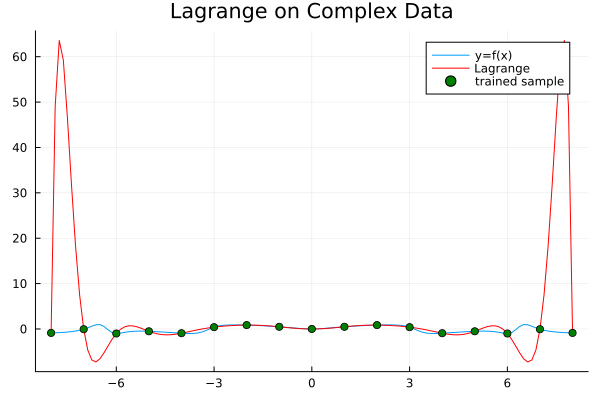

In [46]:
Xlag = -8.0:1.0:8.0
lagrange = buildLagrange(Dict(x => f(x) for x in Xlag))

Ylag = [calcPoly(lagrange, x) for x in Xs]

plot(Xs, Yreal, title="Lagrange on Complex Data", label="y=f(x)")
plot!(Xs, Ylag, color="red", label="Lagrange")
scatter!(Xlag, [f(x) for x in Xlag], color="green", label="trained sample")

Not so good! **Don't use with too many points then!**